In [1]:
import pandas as pd
import requests
import io
import os
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/jerrywu2013/Hiskio_data/master/COVID-19.csv"
s = requests.get(url).content
COVID = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = COVID

In [3]:
df

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52.0,COVID-19,Y,NaN,N,N,N,25-Jan-20
...,...,...,...,...,...,...,...,...,...,...
925,468,F,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
926,469,F,25.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
927,469,F,25.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
928,470,M,55.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               930 non-null    object 
 1   sex                     850 non-null    object 
 2   age                     693 non-null    float64
 3   finding                 930 non-null    object 
 4   RT_PCR_positive         582 non-null    object 
 5   survival                358 non-null    object 
 6   intubated               243 non-null    object 
 7   in_icu                  331 non-null    object 
 8   needed_supplemental_O2  88 non-null     object 
 9   date                    650 non-null    object 
dtypes: float64(1), object(9)
memory usage: 72.8+ KB


In [5]:
df.head()

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52.0,COVID-19,Y,NaN,N,N,N,25-Jan-20


In [6]:
newdf = df.dropna(axis=1,how='all') 
newdf = newdf.fillna('NN')

In [7]:
newdf

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52.0,COVID-19,Y,NN,N,N,N,25-Jan-20
...,...,...,...,...,...,...,...,...,...,...
925,468,F,50.0,Pneumonia,NN,NN,NN,NN,NN,NN
926,469,F,25.0,Pneumonia,NN,NN,NN,NN,NN,NN
927,469,F,25.0,Pneumonia,NN,NN,NN,NN,NN,NN
928,470,M,55.0,Pneumonia,NN,NN,NN,NN,NN,NN


In [9]:
le = preprocessing.LabelEncoder()
le.fit(newdf["sex"].unique())
list(le.classes_)
sex_le = le.transform(newdf["sex"])
#category_le
#len(category_le)
#category_le[0:100]
#list(le.inverse_transform([64, 3, 8]))
newdf["sex_le"] = sex_le

In [10]:
le = preprocessing.LabelEncoder()
le.fit(newdf["finding"].unique())
list(le.classes_)
finding_le = le.transform(newdf["finding"])
newdf["finding_le"] = finding_le
#COVID-19 = 5

In [11]:
le = preprocessing.LabelEncoder()
le.fit(newdf["RT_PCR_positive"].unique())
list(le.classes_)
RT_PCR_positive_le = le.transform(newdf["RT_PCR_positive"])
newdf["RT_PCR_positive_le"] = RT_PCR_positive_le

In [12]:
le = preprocessing.LabelEncoder()
le.fit(newdf["survival"].unique())
list(le.classes_)
survival_le = le.transform(newdf["survival"])
newdf["survival_le"] = survival_le

In [13]:
le = preprocessing.LabelEncoder()
le.fit(newdf["intubated"].unique())
list(le.classes_)
intubated_le = le.transform(newdf["intubated"])
newdf["intubated_le"] = intubated_le

In [14]:
le = preprocessing.LabelEncoder()
le.fit(newdf["in_icu"].unique())
list(le.classes_)
in_icu_le = le.transform(newdf["in_icu"])
newdf["in_icu_le"] = in_icu_le

In [15]:
le = preprocessing.LabelEncoder()
le.fit(newdf["needed_supplemental_O2"].unique())
list(le.classes_)
needed_supplemental_O2_le = le.transform(newdf["needed_supplemental_O2"])
newdf["needed_supplemental_O2_le"] = needed_supplemental_O2_le

In [16]:
le = preprocessing.LabelEncoder()
le.fit(newdf["date"].unique())
list(le.classes_)
date_le = le.transform(newdf["date"])
newdf["date_le"] = date_le

In [17]:
newdf

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date,sex_le,finding_le,RT_PCR_positive_le,survival_le,intubated_le,in_icu_le,needed_supplemental_O2_le,date_le
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20,1,5,2,2,0,0,2,41
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20,1,5,2,2,0,0,2,45
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20,1,5,2,2,0,0,2,50
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20,1,5,2,2,0,0,2,51
4,4,F,52.0,COVID-19,Y,NN,N,N,N,25-Jan-20,0,5,2,1,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,468,F,50.0,Pneumonia,NN,NN,NN,NN,NN,NN,0,34,0,1,1,1,1,73
926,469,F,25.0,Pneumonia,NN,NN,NN,NN,NN,NN,0,34,0,1,1,1,1,73
927,469,F,25.0,Pneumonia,NN,NN,NN,NN,NN,NN,0,34,0,1,1,1,1,73
928,470,M,55.0,Pneumonia,NN,NN,NN,NN,NN,NN,1,34,0,1,1,1,1,73


In [18]:
col_data = ['date_le','sex_le', 'RT_PCR_positive_le','survival_le','intubated_le','in_icu_le','needed_supplemental_O2_le']
new_pd = pd.DataFrame(newdf[col_data])
X = new_pd
y = newdf["finding_le"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
type(X_train),type(X_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

##隨機森林(Random Forests)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
#['amt.pledged','currency_le','percentage.funded','state_le','type_le']

RT_PCR_positive_le           0.519843
date_le                      0.195217
intubated_le                 0.086275
in_icu_le                    0.072210
sex_le                       0.046082
survival_le                  0.045932
needed_supplemental_O2_le    0.034440
dtype: float64

In [26]:
le.fit(newdf["finding"].unique())
list(le.classes_)
finding_le = le.transform(newdf["finding"])
#le.inverse_transform(y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


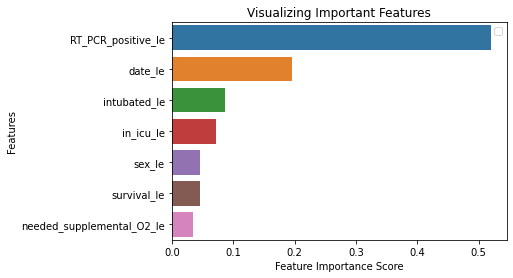

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [29]:
clf.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state

In [28]:
estimator = clf.estimators_[10]

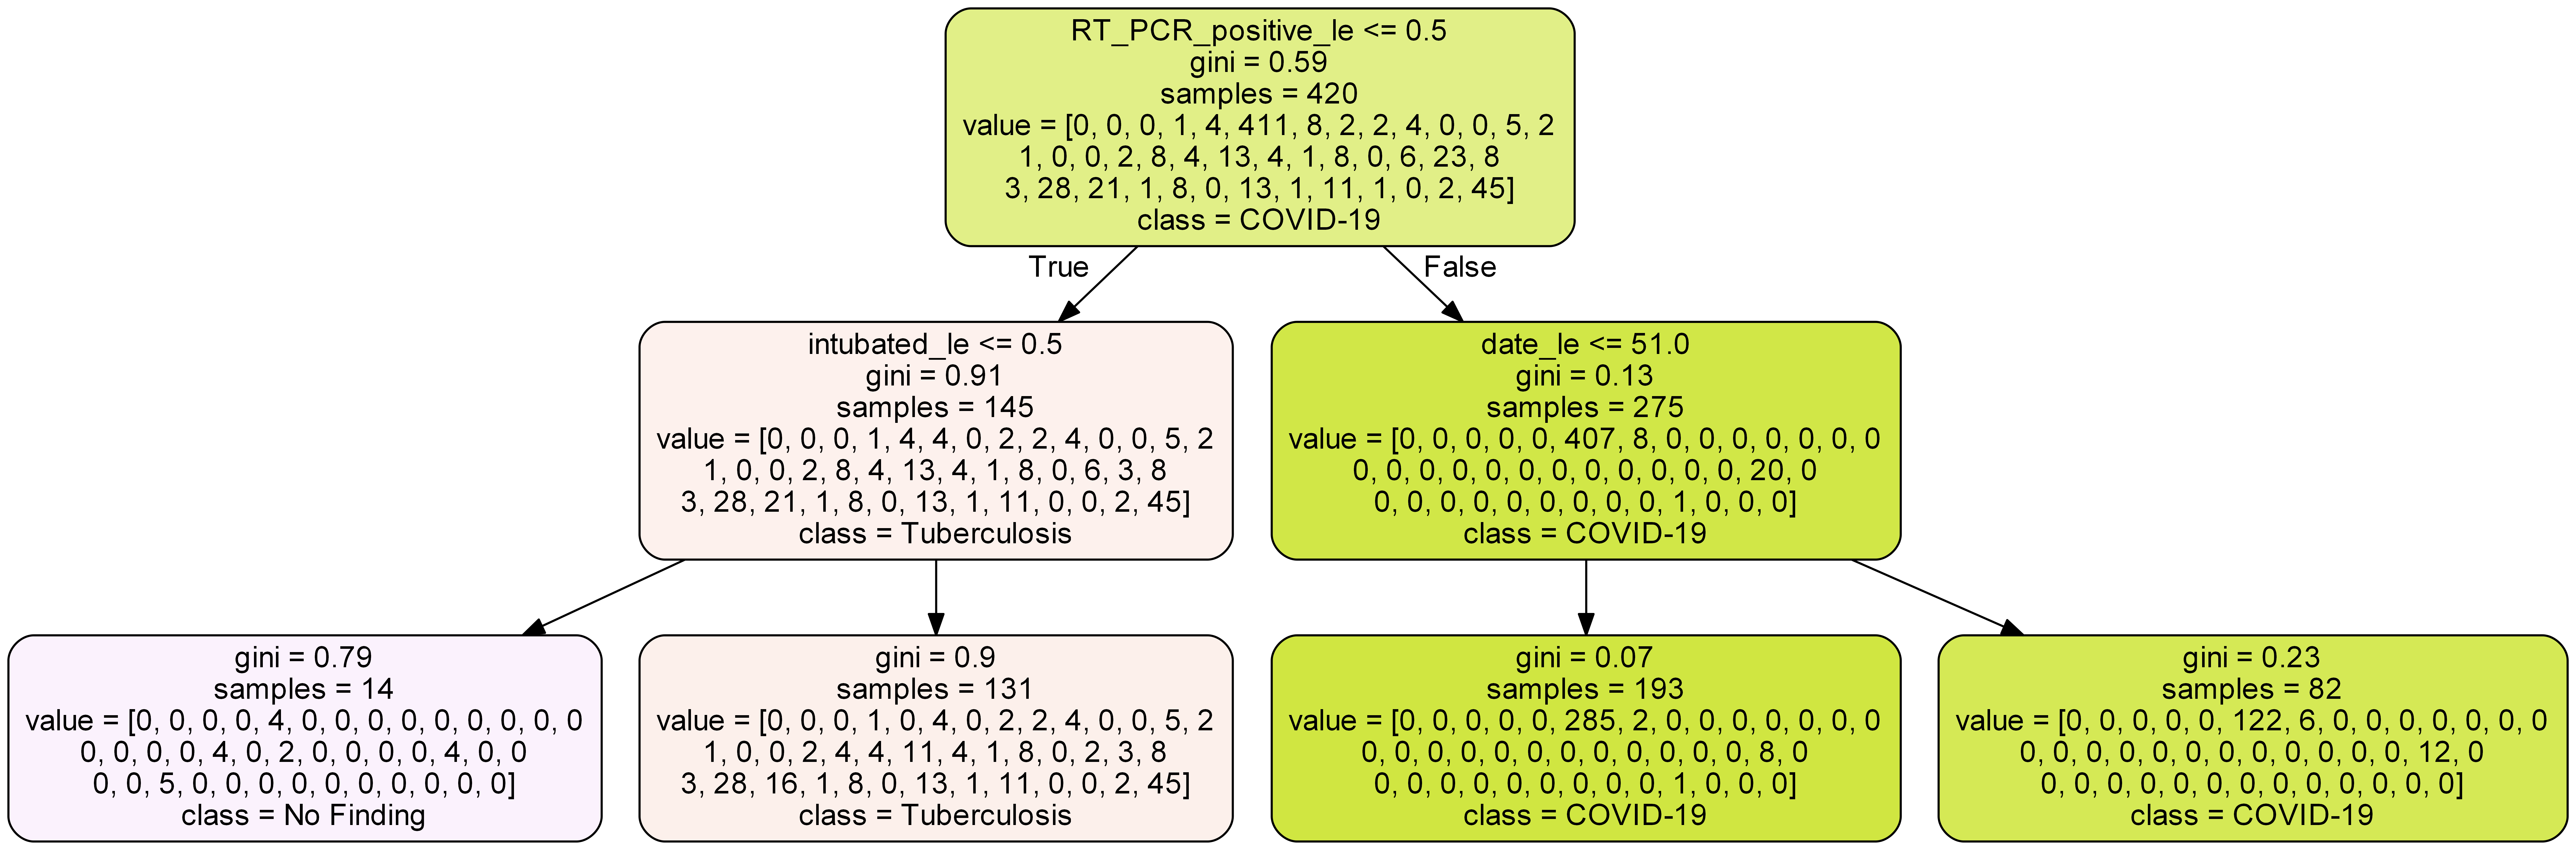

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = le.classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

## 極限梯度提升樹(eXtreme Gradient Boosting)

In [34]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [37]:
X_train

,date_le,sex_le,RT_PCR_positive_le,survival_le,intubated_le,in_icu_le,needed_supplemental_O2_le
66,32,0,0,1,1,1,1
629,38,0,2,2,0,0,0
364,73,1,1,2,1,2,1
368,73,1,2,2,1,1,1
804,73,1,0,1,1,1,1
...,...,...,...,...,...,...,...
767,73,0,0,1,2,2,1
72,55,1,2,1,1,1,1
908,73,0,0,1,1,1,1
235,38,1,1,1,1,1,1


In [42]:
y_train

66     38
629     5
364     5
368     5
804    31
       ..
767    17
72      5
908    40
235     5
37      5
Name: finding_le, Length: 651, dtype: int32

In [43]:
# https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [44]:
y_train

array([34,  5,  5,  5, 27,  4, 32, 24,  5,  5, 34,  5,  5,  5,  5, 36,  5,
        5,  5,  5,  5,  5,  5, 30,  5, 34, 12,  5,  5, 30,  0,  5,  5, 30,
       23,  5,  5, 18, 27, 34,  5,  5,  5,  5,  5, 40,  5,  5,  5, 40, 40,
       32,  5,  5,  5,  5,  5, 34, 40,  5, 20, 20,  5,  5, 17, 28,  5, 32,
        5,  5,  5, 40,  5, 32,  5, 24,  5, 40,  9,  5, 39, 34, 40,  5,  5,
        5, 38, 40,  5,  5,  5, 40,  5,  5,  5, 27,  5,  5,  5, 37,  5,  5,
        5, 29, 29, 30,  6,  5,  5, 40, 21,  5,  5,  5, 35,  5,  5, 25,  5,
        5,  5,  5, 30, 29,  5,  5,  5,  5, 21, 29, 34,  5,  5,  5,  5,  5,
        5,  5, 32,  5,  5, 40,  5,  5, 40, 26,  5,  5,  5,  5, 29, 40,  5,
       40,  5,  5, 40,  5, 26,  5,  5,  5, 36,  5, 15, 30, 34, 34,  5,  5,
        5,  5,  5,  5, 40,  5,  5,  6,  5,  5,  5, 29,  5,  5,  5, 18,  5,
       27, 39,  5, 30,  5, 20,  9, 40,  5,  5,  5,  5, 40, 20, 32,  6, 36,
        5,  5, 40,  5, 26,  5, 25,  5,  5,  5, 19,  5, 29,  5,  5,  5, 40,
        5,  5, 40,  5,  5

In [45]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

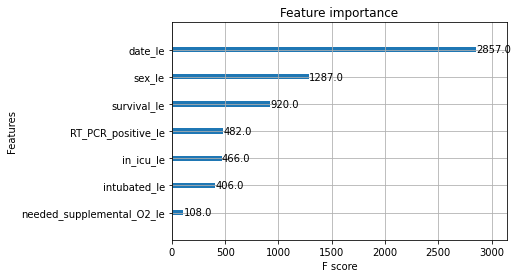

In [46]:
plot_importance(model)